In [19]:
print(ord("M") % 3 + 1)

3


In [20]:
import csv
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as pyplot

def plot_APC_losses_last_200_days(file_name):
    data = pandas.read_csv(file_name)
    data["date"] = pandas.to_datetime(data["date"])
    last_200_days_data = data.tail(201)
    pyplot.figure(figsize=(8, 6), dpi=100)
    pyplot.plot(last_200_days_data["date"][:200], numpy.diff(last_200_days_data["APC"]), label="БТРи")
    pyplot.xlabel("Дата")
    pyplot.ylabel("Кількість БТРів")
    pyplot.title("Втрати БТРів за останні 200 днів")
    pyplot.legend()
    pyplot.grid(True)
    pyplot.savefig("APC_losses_last_200_days.png")
    pyplot.show()

file_name = "lab_1/russia_losses_equipment.csv"

with open(file_name, 'r', newline='') as file:
    csv_reader = csv.reader(file)
    data = list(csv_reader)
    headers = data[0]
    data = pandas.DataFrame(data[1:], columns=headers)

# Добові втрати БТРів

In [21]:
apc_losses = numpy.array(data["APC"].astype(int))

daily_losses = numpy.diff(apc_losses, prepend=0)
print(daily_losses)

[516 190   0 110  30  16  38  39   6  40  14  37  34  35  60  40  21  23
  30  96  60  13  22  17  48  21  22  19  28  15  24  30  16  13  12  16
  25  54  14  14   3  30   0   4  16  12  23  18   4   8   6  20  39  22
  24  31  44  43  33  20  50  34  47  29  27  26  48  48  43  41  35  27
  28  23  44  48  17  27  34  24  16  35  34  20  27  26  25  25  28  19
  22  11  12  12  12  20  41  11  12  13  13   8  16  13   9  12  16  18
   8  11  25  17  18  10   4  11  18   8  18   5   8  14  28  17  16   6
  10   1   7   0  28  17   8  14   4   8   5   1   3   0  34   8   5   7
   6  13   7   8   9  13   8   9  12   8   8   8   9   7   3   8   4   6
  19   4  15   6  10  14   8   7  11  15  11  10  17  16  17  12   6   8
   5   2   6   3   3  12  25  18  33  21  37  27  29  25  36  37  18   9
  33  23  22   3  17   8  11  17   2   4  24  28  20  11  25  25  24   8
  20  23  17  26  16  27  20  26  29  18  22  16  13  19 -14   5   7  14
  12  14  16  20   3   8  18  11  26  30  13  14  2

# 5 найбільших добових втрат БТРів

In [22]:
top_5_daily_losses = numpy.partition(-daily_losses, 5)[:5]
print(-top_5_daily_losses)

[120 190 516 110  96]


# Кількість БТРів знищено влітку 2023 року

In [23]:
print(apc_losses[data["date"] == "2023-08-31"].astype(int) - apc_losses[data["date"] == "2023-05-31"].astype(int))

[1132]


# Середнє значення знищених БТРів за 100-500 днів війни

In [24]:
numpy.mean(daily_losses[99 - 1:499])

11.468827930174564

# Графік втрат БТРів за останні 200 днів

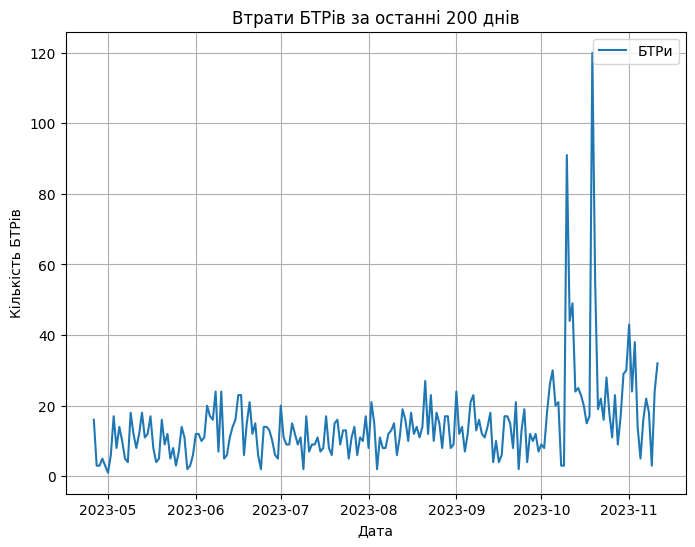

In [25]:
plot_APC_losses_last_200_days(file_name)